                                              LISTA  VOTI_LISTA      PERC
42352                           PARTITO DEMOCRATICO          43  0.227513
42353                         POPOLARI PER L'ITALIA           0  0.000000
42354                            PARTITO ANIMALISTA           0  0.000000
42355                        AUTONOMIE PER L'EUROPA           0  0.000000
42356                                  FORZA ITALIA          20  0.105820
42357                             FRATELLI D'ITALIA           9  0.047619
42358                            MOVIMENTO 5 STELLE          11  0.058201
42359                                PARTITO PIRATA           1  0.005291
42360               CASAPOUND ITALIA - DESTRE UNITE           0  0.000000
42361                          LEGA SALVINI PREMIER          88  0.465608
42362                                  EUROPA VERDE           3  0.015873
42363       +EUROPA - ITALIA IN COMUNE - PDE ITALIA           3  0.015873
42364                                 

C:\Users\franc\AppData\Local\Temp\ipykernel_17920\3279074926.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comune['PERC'] = comune['VOTI_LISTA'] / comune['VOTANTI']


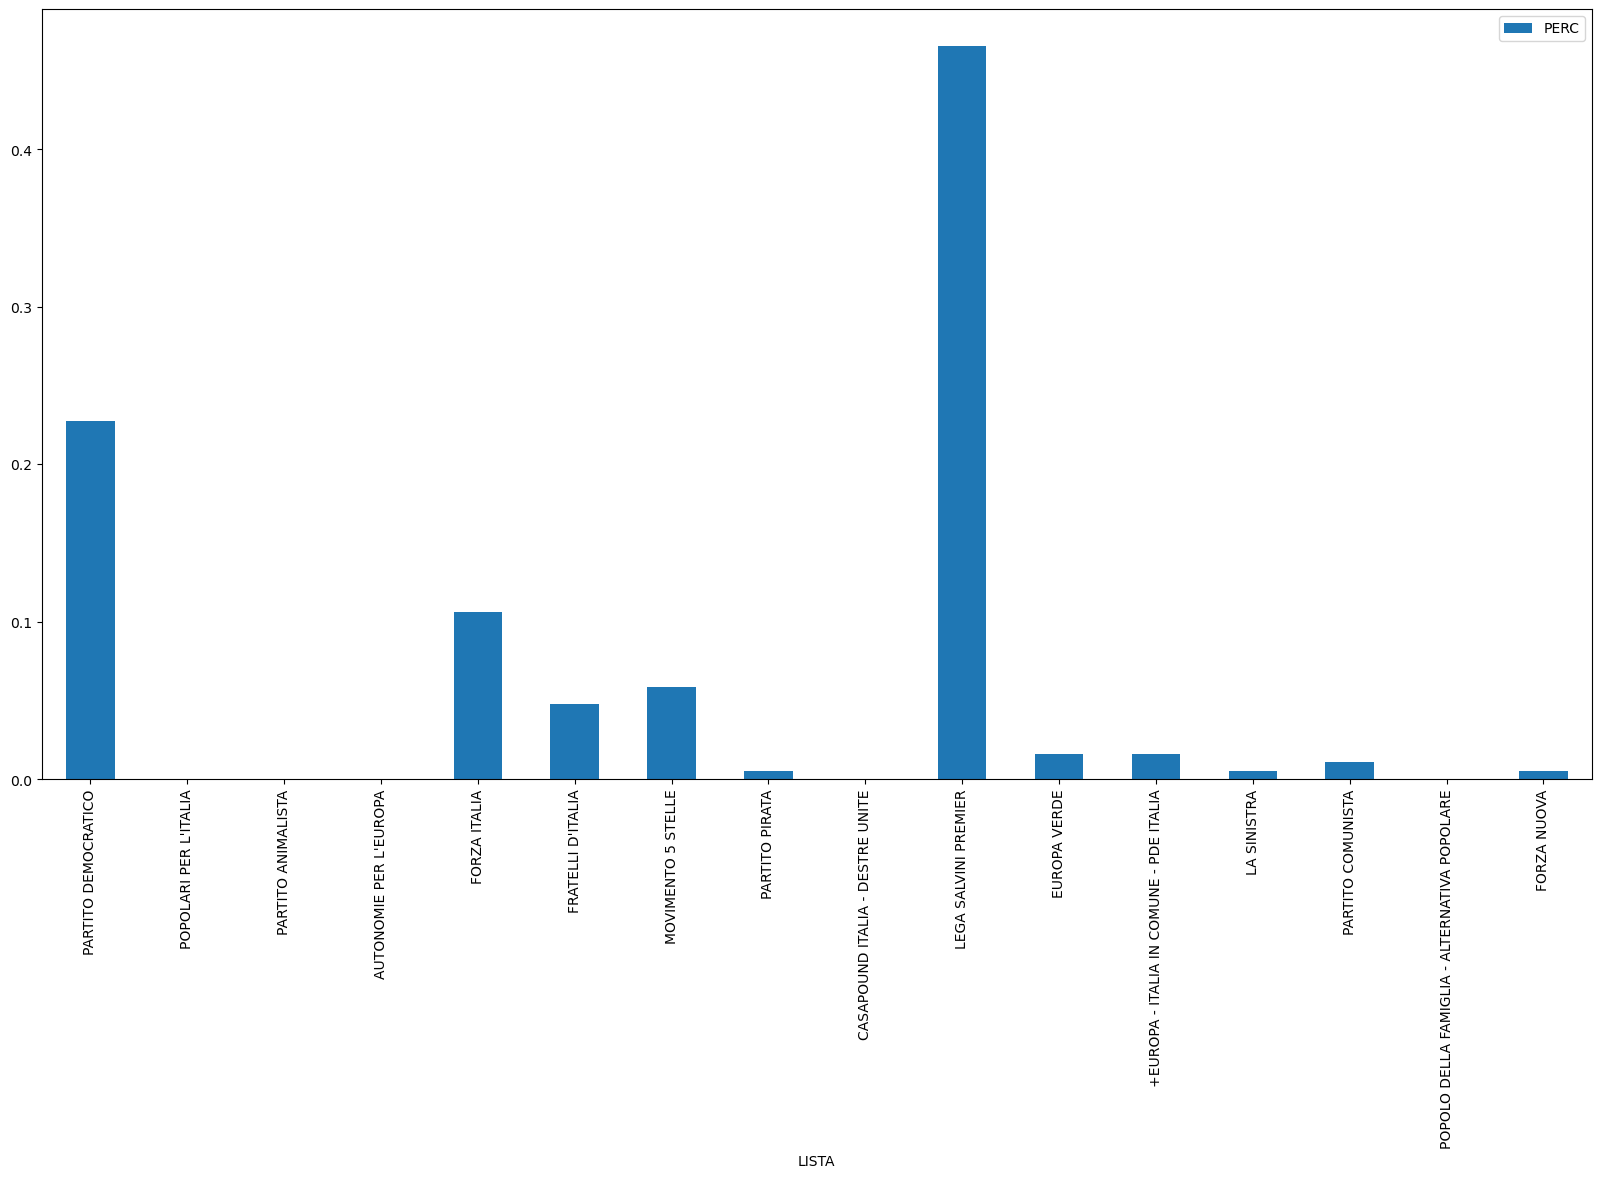

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file with a semi-colon separator and latin1 encoding
file_path = "C:/Users/franc/Desktop/europee-20190526.txt"
election_data = pd.read_csv(file_path, sep=";", encoding='latin1')
comune = election_data[election_data['COMUNE'] == 'ABBADIA CERRETO']
#view casier in a table 
comune.head()

#plot a bar chart of the percentage of votes for each party
#we don't have percentage of votes, so we need to calculate it
#we need to divide VOTI_LISTA by VOTANTI
comune['PERC'] = comune['VOTI_LISTA'] / comune['VOTANTI']
comune.plot.bar(x='LISTA', y='PERC', rot=90, figsize=(20, 10))

#show also the table with the votes and the percentages for all parties
print(comune[['LISTA', 'VOTI_LISTA', 'PERC']])



LISTA
+EUROPA - ITALIA IN COMUNE - PDE ITALIA          822764
AUTONOMIE PER L'EUROPA                            17629
CASAPOUND ITALIA - DESTRE UNITE                   88724
EUROPA VERDE                                     609678
FORZA ITALIA                                    2344465
FORZA NUOVA                                       40782
FRATELLI D'ITALIA                               1723232
LA SINISTRA                                      465092
LEGA SALVINI PREMIER                            9153638
MOVIMENTO 5 STELLE                              4552527
PARTITO ANIMALISTA                               159344
PARTITO COMUNISTA                                234232
PARTITO DEMOCRATICO                             6050351
PARTITO PIRATA                                    60308
POPOLARI PER L'ITALIA                             79951
POPOLO DELLA FAMIGLIA - ALTERNATIVA POPOLARE     113875
PPA MOVIMENTO POLITICO PENSIERO AZIONE             5017
SVP                                       

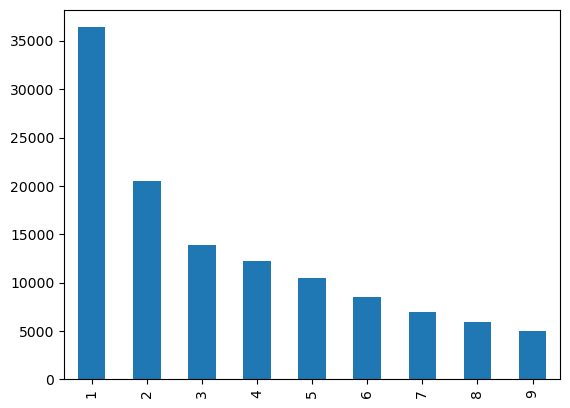

In [9]:
#group by LISTA and sum the VOTI_LISTA
#first we need to convert VOTI_LISTA to int
election_data['VOTI_LISTA'] = election_data['VOTI_LISTA'].astype(int)
grouped = election_data.groupby('LISTA')['VOTI_LISTA'].sum()
print(grouped)
#write the names of the column of grouped as LISTA and VOTI_LISTA
grouped = grouped.reset_index()
print(grouped)

#write the frequency only of the first digit of the VOTI_LISTA using gruped
#first we need to convert VOTI_LISTA to string
grouped['VOTI_LISTA'] = grouped['VOTI_LISTA'].astype(str)
#then we need to take the first digit of the string
grouped['VOTI_LISTA'] = grouped['VOTI_LISTA'].str[0]
#finally we can count the frequency of the first digit and we write the frequency on a table
print(grouped['VOTI_LISTA'].value_counts())
grouped['VOTI_LISTA'].value_counts().plot.bar()

#do this analysisi for each COMUNE, so we need to group by COMUNE
grouped = election_data.groupby(['COMUNE', 'LISTA'])['VOTI_LISTA'].sum()
grouped = grouped.reset_index()
grouped['VOTI_LISTA'] = grouped['VOTI_LISTA'].astype(str)
grouped['VOTI_LISTA'] = grouped['VOTI_LISTA'].str[0]
print(grouped['VOTI_LISTA'].value_counts())
grouped['VOTI_LISTA'].value_counts().plot.bar()

#we exlcude 0 from the analysis
grouped = grouped[grouped['VOTI_LISTA'] != '0']
print(grouped['VOTI_LISTA'].value_counts())
grouped['VOTI_LISTA'].value_counts().plot.bar()


#write the percentages of the first digit of VOTI_LISTA for all the COMUNE, without a plot
print(grouped['VOTI_LISTA'].value_counts(normalize=True))


1    0.292409
2    0.164854
3    0.112059
0    0.098172
4    0.084380
5    0.068234
6    0.055688
7    0.047354
8    0.040490
9    0.036359
Name: first_digit, dtype: float64


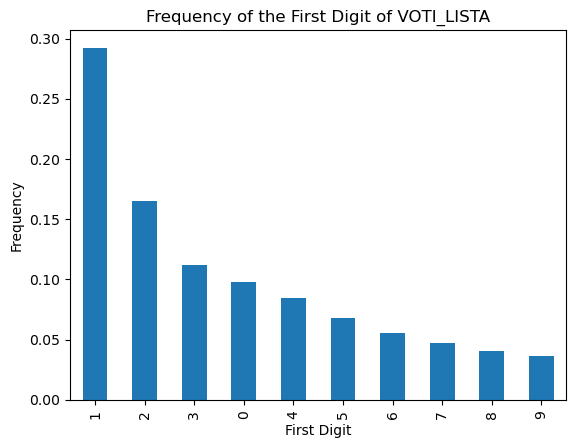

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

election_data['VOTI_LISTA'] = election_data['VOTI_LISTA'].astype(int)
grouped = election_data.groupby(['COMUNE', 'LISTA'])['VOTI_LISTA'].sum().reset_index()
grouped['first_digit'] = grouped['VOTI_LISTA'].astype(str).str[0]

global_frequency = grouped['first_digit'].value_counts(normalize=True)
print(global_frequency)
global_frequency.plot.bar()
plt.title('Frequency of the First Digit of VOTI_LISTA')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.show()



<AxesSubplot:>

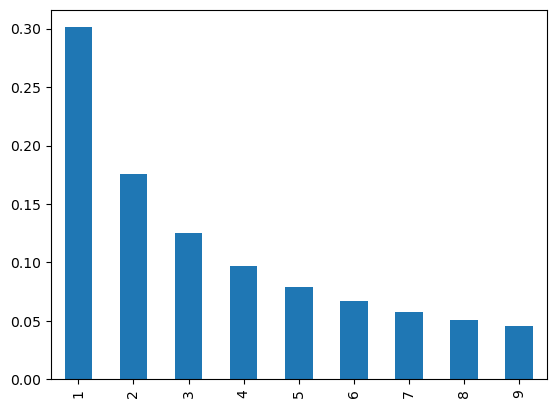

In [12]:
benford = pd.Series([0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046], index=[1, 2, 3, 4, 5, 6, 7, 8, 9])
benford.plot.bar()
